## load data + cleaning

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import os

In [2]:
def first_aid(df):
    temp = 'data/'+df+'.csv'
    df = pd.read_csv(temp , sep =',', names = list(range(0,30)))
    df = df[[4,0,5,1,2,3]+list(range(6,29))]
    df[5] = df[5].map(lambda x: x.lstrip('מספר תגובות -'))
    df.columns = ['url','data','number_comment','name','title']+list(range(1,25))
    return df

os.chdir('C:/Users/RSHLE/Google Drive/2020/semester b/nlpH/final project')
joy = first_aid('pain')
bowel_diseases = first_aid('bowel_diseases')
joints = first_aid('joints')
psoriasis = first_aid('psoriasis')
sclerosis = first_aid('sclerosis')

## organize data + future engineer
### Collect names in one column

In [3]:
def isNaN(num):
    #check if isNaN
    return num != num
def extract_name(dat,i,j):
    #get a cell, and extracts the name and response
    if not isinstance(dat,str):
        print('Mistake at point'+ str(i)+' ' + str(j) + 'Does not send string')
        return ['','']
    x1 = dat.find('XX')
    x2 = dat.rfind('XX')
    if x1 or x2 <0:
        print("Can't find Name"+ str(i) + "," + str(j))
        return['','']
    name = dat[x1+2:x2]
    text = dat[x2+2:]
    if len(name) > 30:
        print("Can't extract Name"+ str(i) + "," + str(j))
        return ['','']
    return [name,text]

def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
        str1 += ","
    return str1
def organize_name(df):
    #Gets DF and deletes the responses from the names and centers them in one cell
    dim = df.shape
    for i in range(0,dim[0]):
        name = [df.loc[i,'name']]
        for j in range(6,dim[1]):
            dat = df.iloc[i,j]
            if not isNaN(dat):
                save_cell = extract_name(dat,i,j)
                df.iloc[i,j] = save_cell[1]
                name.append(save_cell[0])
            else:
                break
        df.loc[i,'name'] = listToString(name)
    return df
joy = organize_name(joy)
#bowel_diseases = organize_name(bowel_diseases)
#joints = organize_name(joints)
#psoriasis = organize_name(psoriasis)
#sclerosis = organize_name(sclerosis)

joy1 = joy.copy()

Can't extract Name121,9
Can't extract Name361,11


In [4]:
print('hukk')

hukk


### clean the text + convert to lemmas

In [8]:
import os
os.chdir('C:/Users/RSHLE/yapproj/YAP-Wrapper/')
from yap_api import *
ip='127.0.0.1:8000'
yap=YapApi()




def delete_word(item,delete_list):
    # delete words form the cell
    for word in delete_list:
        item = ''.join(re.split(word,item))
        if word in item:
            loc = item.find(word)
            while loc > -1:
                length_w = len(word)
                item = item[:loc] + item[loc+length_w:]
                loc = item.find(word)
    return item


def regex_remove(item,list_ex):
    for reg in list_ex:
        pattern = re.compile(reg)
        item = pattern.sub('', item)
    return item

def clean_df(item):
    #get cell and list of word that not allowed to be contain in the cell
    #return the cell clean
    delete_list = ['&nbsp;','&quot;',"&#39;"]
    list_regex = ['<.+?>','\S*@\S*\s?','http\S+',"\d{2}\d*-\d{7}"]
    #list reg  =    <>   ,   email      , web  ,   phone number
    if isNaN(item):
        return item
    item = delete_word(item,delete_list)
    item = regex_remove(item,list_regex)
    tokenized_text, segmented_text, lemmas, dep_tree, md_lattice, ma_lattice=yap.run(item, ip)
    item = lemmas
    return item





def run_over_DF(df,fun):
#Unfortunately applymap run to MemoryError: in some case. This function overcomes this obstacle
    dim = df.shape
    for i in range(0,dim[0]):
        #if i % 100 == 0:
        print('#########',i)
        for j in range(4,dim[1]):
            print(j)
            dat = fun(df.iloc[i,j])
            df.iloc[i,j] = dat
    return df
joy = run_over_DF(joy,clean_df)

#bowel_diseases = bowel_diseases.applymap(clean_df)
#joints = joints.applymap(clean_df)
#psoriasis = psoriasis.applymap(clean_df)
#sclerosis = sclerosis.applymap(clean_df)

os.chdir('C:/Users/RSHLE/Google Drive/2020/semester b/nlpH/final project')
joy.to_csv('joy_lemma.csv',sep ='\t', encoding='utf-32')


6
27
28
######### 1140
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1141
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1142
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1143
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1144
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1145
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1146
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1147
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1148
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1149
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1150
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
######### 1151
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23

In [10]:
os.chdir('C:/Users/RSHLE/Google Drive/2020/semester b/nlpH/final project')
joy.to_csv('temp.csv',sep ='\t', encoding='utf-32')
#tokenized_text, segmented_text, lemmas, dep_tree, md_lattice, ma_lattice=yap.run(text, ip)
text = joy.iloc[0,6]
print(text)



שלום עסאף , קודם כול רק ב ריאה ו הרגיש טוב ! צר ל אני שמע על מה ש עברת . ל דעה רופא טוב אמור וידא ש היה רופא אחר ש טיפל ב אתה , ש נעשה ל אתה ביקורת תקופתי , רופא מתאים מ ה תחום ש הוא צריך . ב כול אופן , האם עברה EMG ? בנוסף , המליץ ל אתה ביקש הפניה ל מרפאה כאב , יש מרפאה ש התמחה נטה ב שיכוך כאב , הוא תרופתי ו הוא הבחין אחר של זריקה אלקטרודות ו עוד סוג טיפול אחר . המליץ ל אתה ב ה חום ! הרגיש טוב ו שבת שלום


## Tokenize

In [12]:
def split_DF_to_word(df):
    #Gets DF and returns a list of the words from all columns and rows
    #Preparing to graph: plot_20_common
    dim = df.shape
    all_words = []
    for i in range(0,dim[0]):
        if i % 100 == 0:
            print('#',i)
        for j in range(4,dim[1]):
            cell = df.iloc[i,j]
            if not isNaN(cell):
                cell = re.sub(r"[><?.\\,\/#!$%\^&\*;:{}=\-_`~+()\"\'0-9]", '', cell)
                temp = cell.split()
                all_words = all_words + temp
            else:
                break
    return all_words

def clean_stop_word(lst,stop = ''):
    if len(stop) == 0:
        stop = list(pd.read_csv('heb_stopwords.txt', sep='\n', header=None)[0])
    temp = []
    for word in lst:
        if word not in stop:
            temp.append(word)
    return temp
joy_lemma = split_DF_to_word(joy)
joy_lemma = clean_stop_word(joy_lemma)
%store joy_lemma

# 0
# 100
# 200
# 300
# 400
# 500
# 600
# 700
# 800
# 900
# 1000
# 1100
# 1200
# 1300
Stored 'joy_lemma' (list)


## Visualization data


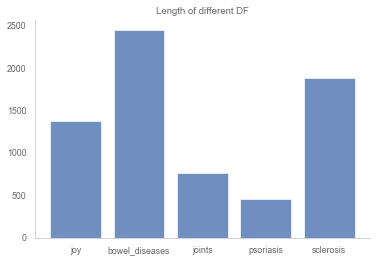

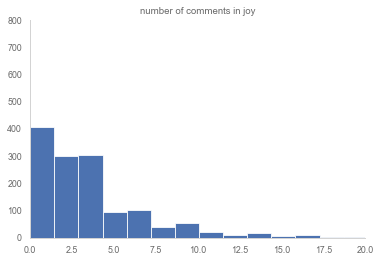

In [14]:
from add_style import *

table = [joy,bowel_diseases,joints,psoriasis,sclerosis]
x = []
for df in table:
    x.append(df.shape[0])
y=['joy','bowel_diseases','joints','psoriasis','sclerosis']
plt.bar(y, x, align='center', alpha=0.8)
plt.title("Length of different DF")
plt.show()

def hist_comment(df,name_DF):
    save = df['number_comment'].tolist()
    save = list(map(int, save))
    plt.hist(save,bins=50)
    plt.axis([0, 20, 0, 800])
    plt.title('number of comments in '+name_DF)
    plt.show()


hist_comment(joy,'joy')


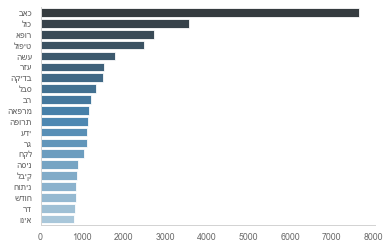

In [16]:
def invert_words_list(words_list):
    #Reverses the direction of the words so that the graphs in Hebrew will be readable
    return [word[::-1] for word in words_list]

def plot_common(words, n=20):
    #Gets text divided into tokens, pulls out a graph
    word_count = Counter(words)
    most=word_count.most_common(n)
    x, y= zip(*most)
    sns.barplot(x=y,y=invert_words_list(x),palette=("Blues_d"))
    sns.set_context("paper")

plot_common(joy_lemma, 20)



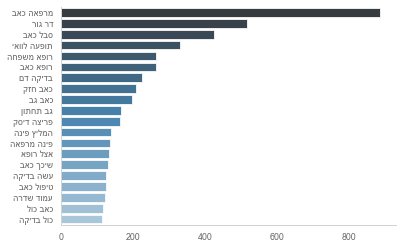

In [17]:
def find_ngrams(input_list, n):
  return list(zip(*[input_list[i:] for i in range(n)]))

def plot_top_ngrams_barchart(text, n=2):
    grams = find_ngrams(text,2)
    grams = Counter(grams)
    grams = grams.most_common(20)
    x,y = zip(*grams)
    temp = []
    for element in x:
        temp.append(' '.join(element))
    sns.barplot(x=y,y=temp)
    sns.barplot(x=y,y=invert_words_list(temp),palette=("Blues_d"))
    sns.set_context("paper")


plot_top_ngrams_barchart(joy_lemma,n=1)

## cloud word


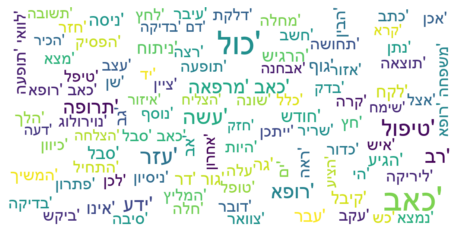

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        font_path='arial',
        scale=3,
        random_state=1)


temp1 = []
comment_words = ''
for word in joy_lemma:
    temp1.append(word[::-1])

wordcloud=wordcloud.generate(str(temp1))

plt.figure(1, figsize = (8, 8))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#TODO: we need to get rid with '
# also, we need to find out how to convert the order of words
#example: כאב למרפאת